# Word embeddings with Gensim using sentences from Wikipedia.
We will be using sentences from Wikipedia as our text corpus. It contains a collection of 7.8 million sentences from the August 2018 English Wikipedia dump.

You can find the dataset here: https://www.kaggle.com/mikeortman/wikipedia-sentences

In [149]:
# Libraries to tokenize sentences
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Word2Vec
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

#Data visualization
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.figsize'] = 9, 7

#Reduce dimensionality of word embeddings for visualization
from sklearn.decomposition import PCA


Here we tokenize the data and clean all punctuation and stop words(e.g. 'the', 'is', 'that', etc) from the data set. Then we train the model. We need to do this because Word2Vec only accepts lists of tokenized sentences, while also filtering useless contextual words. This process takes roughly 15 minutes.

In [38]:
filepath = 'data/wikisent2.txt'
filteredWords = set(stopwords.words('english') + list(string.punctuation))

#Read the dataset and populate the sentences list with tokenized sentences. 
sentences = []
with open(filepath) as fp:
    line = fp.readline()
    while line:
        wordTokens = word_tokenize(line)
        filtered_sentence = [w.lower() for w in wordTokens if not w.lower() in filteredWords]
        sentences.append(filtered_sentence)
        line = fp.readline()
        
#Create the model.
model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=5, workers=10)

#Save model for future use.
model.wv.save_word2vec_format('wikisent2.bin', binary=True)

In [40]:
#Load the previously created model.
model = KeyedVectors.load_word2vec_format('wikisent2.bin', binary=True)

Let's test out our model by finding words used in similar context. 

In [80]:
model.most_similar('embedding')

[('mappings', 0.8207345604896545),
 ('parsing', 0.8091320991516113),
 ('multi-dimensional', 0.8022617101669312),
 ('encapsulation', 0.7978992462158203),
 ('user-defined', 0.7904070019721985),
 ('abstraction', 0.7859013080596924),
 ('parallelism', 0.7827283143997192),
 ('segmentation', 0.7815800905227661),
 ('partitioning', 0.7786532044410706),
 ('specifying', 0.7780011892318726)]

In [81]:
model.most_similar('garlic')

[('onions', 0.9284669756889343),
 ('cloves', 0.9196341633796692),
 ('almonds', 0.9161800742149353),
 ('carrots', 0.9101073741912842),
 ('walnuts', 0.9100131988525391),
 ('cinnamon', 0.9082777500152588),
 ('celery', 0.9073613882064819),
 ('currants', 0.9062420725822449),
 ('leeks', 0.9011278748512268),
 ('coriander', 0.8972013592720032)]

In [82]:
model.most_similar('university')

[('college', 0.7451135516166687),
 ('asu', 0.6928170919418335),
 ('institute', 0.665592610836029),
 ('polytechnic', 0.6419583559036255),
 ('faculty', 0.6391634941101074),
 ('graduate', 0.5971936583518982),
 ('campus', 0.5937646627426147),
 ('nyu', 0.5829755663871765),
 ('uab', 0.5821531414985657),
 ('usu', 0.5818154215812683)]

In [83]:
model.most_similar('honor')

[('valor', 0.6638562679290771),
 ('bravery', 0.6172094345092773),
 ('recipient', 0.6163497567176819),
 ('honors', 0.6139286160469055),
 ('gallantry', 0.612633228302002),
 ('award', 0.6007881164550781),
 ('dedication', 0.5870120525360107),
 ('commendation', 0.5843425989151001),
 ('meritorious', 0.5829532742500305),
 ('heroism', 0.5778750777244568)]

The most popular word embedding result shown below:

King + Woman - Man = Queen 

In [84]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print(result[0])

('queen', 0.6748989224433899)


# Analogies
We can use the Word2Vec to discover analogies. For example, Japan is to Japanese as Australia is to Australian.

In [85]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [86]:
analogy('japan', 'japanese', 'australia')

'australian'

In [87]:
analogy('australia', 'beer', 'france')

'cheese'

In [88]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [89]:
analogy('tall', 'tallest', 'long')

'longest'

In [90]:
analogy('berlin', 'germany', 'ottawa')

'canada'

In [91]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


# Visualization of Embeddings
Our word embeddings have a dimension of 100, but we can apply Principal Component Analysis (PCA) to reduce the dimensionality to two so that we may create visualizations in two-dimensional space.

In [150]:
def displayPCAscatterplot(model, words):
    wordVectors = [model[w] for w in words]
    twoDim = PCA().fit_transform(wordVectors)[:,:2]

    plot = sns.scatterplot(x = twoDim[:, 0], y = twoDim[:, 1])
    for word, (x,y) in zip(words, twoDim):
        plot.text(x+.02, y, str(word))

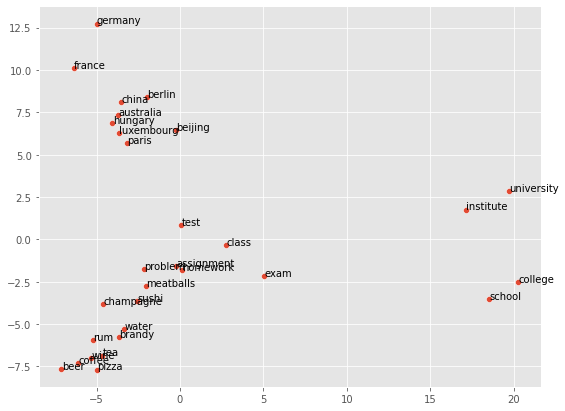

In [151]:
words = ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water', 
          'pizza',  'sushi', 'meatballs',
         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'china', 'berlin', 'beijing', 'paris',
         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
         'school', 'college', 'university', 'institute'
        ]

displayPCAscatterplot(model, words)